In [1]:
!pip install torchsummary

In [2]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns           # for working with maps
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts 
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [3]:
dataset="C:/Users/nehal/Downloads/datast"
# Training Data
train_data="C:/Users/nehal/Downloads/datast/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
# Validation Data
valid_data="C:/Users/nehal/Downloads/datast/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
# Testing Data
test_data="C:/Users/nehal/Downloads/datast/test"

In [4]:
diseases=os.listdir(train_data)
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [5]:
print("Number of classes : ",len(diseases))

Number of classes :  38


In [6]:
nums_train={}
nums_valid={}
for disease in diseases:
    nums_train[disease]=len(os.listdir(train_data+'/'+disease))
    nums_valid[disease]=len(os.listdir(valid_data+'/'+disease))
image_class_count_train=pd.DataFrame(nums_train.values(),index=nums_train.keys(),columns=['No. of images'])
print('Training data images count per class : ',)
print(image_class_count_train)

Training data images count per class : 
                                                    No. of images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___healthy                     

In [7]:
image_class_count_valid=pd.DataFrame(nums_valid.values(),index=nums_valid.keys(),columns=['No. of images'])
print('Validation data images count per class : ',)
print(image_class_count_valid)

Validation data images count per class : 
                                                    No. of images
Apple___Apple_scab                                            504
Apple___Black_rot                                             497
Apple___Cedar_apple_rust                                      440
Apple___healthy                                               502
Blueberry___healthy                                           454
Cherry_(including_sour)___healthy                             456
Cherry_(including_sour)___Powdery_mildew                      421
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Corn_(maize)___Common_rust_                                   477
Corn_(maize)___healthy                                        465
Corn_(maize)___Northern_Leaf_Blight                           477
Grape___Black_rot                                             472
Grape___Esca_(Black_Measles)                                  480
Grape___healthy                   

<Axes: title={'center': 'Training data images count per class'}, xlabel='Number of images', ylabel='Classes'>

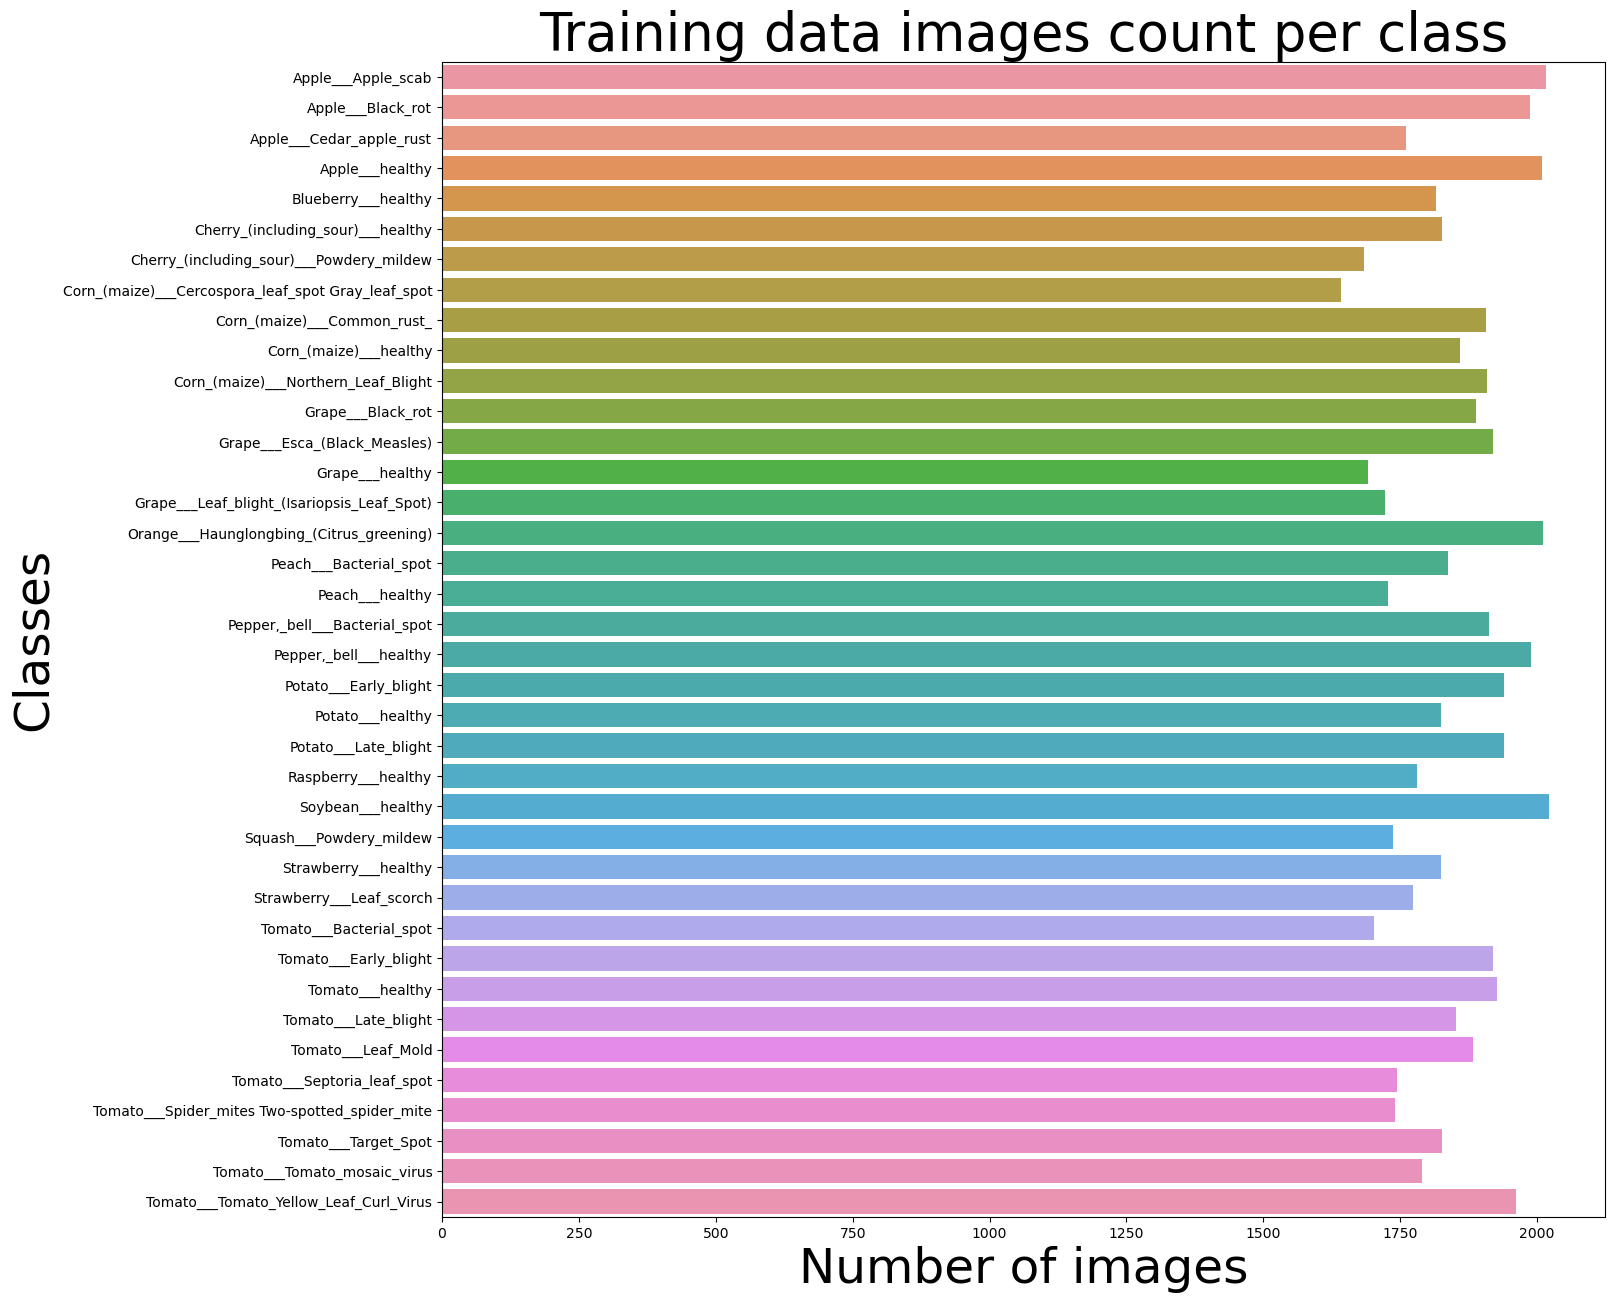

In [8]:
plt.figure(figsize=(15,15))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_train.keys())
vals=list(nums_train.values())
sns.barplot(y=keys,x=vals)

<Axes: title={'center': 'Validation data images count per class'}, xlabel='Number of images', ylabel='Classes'>

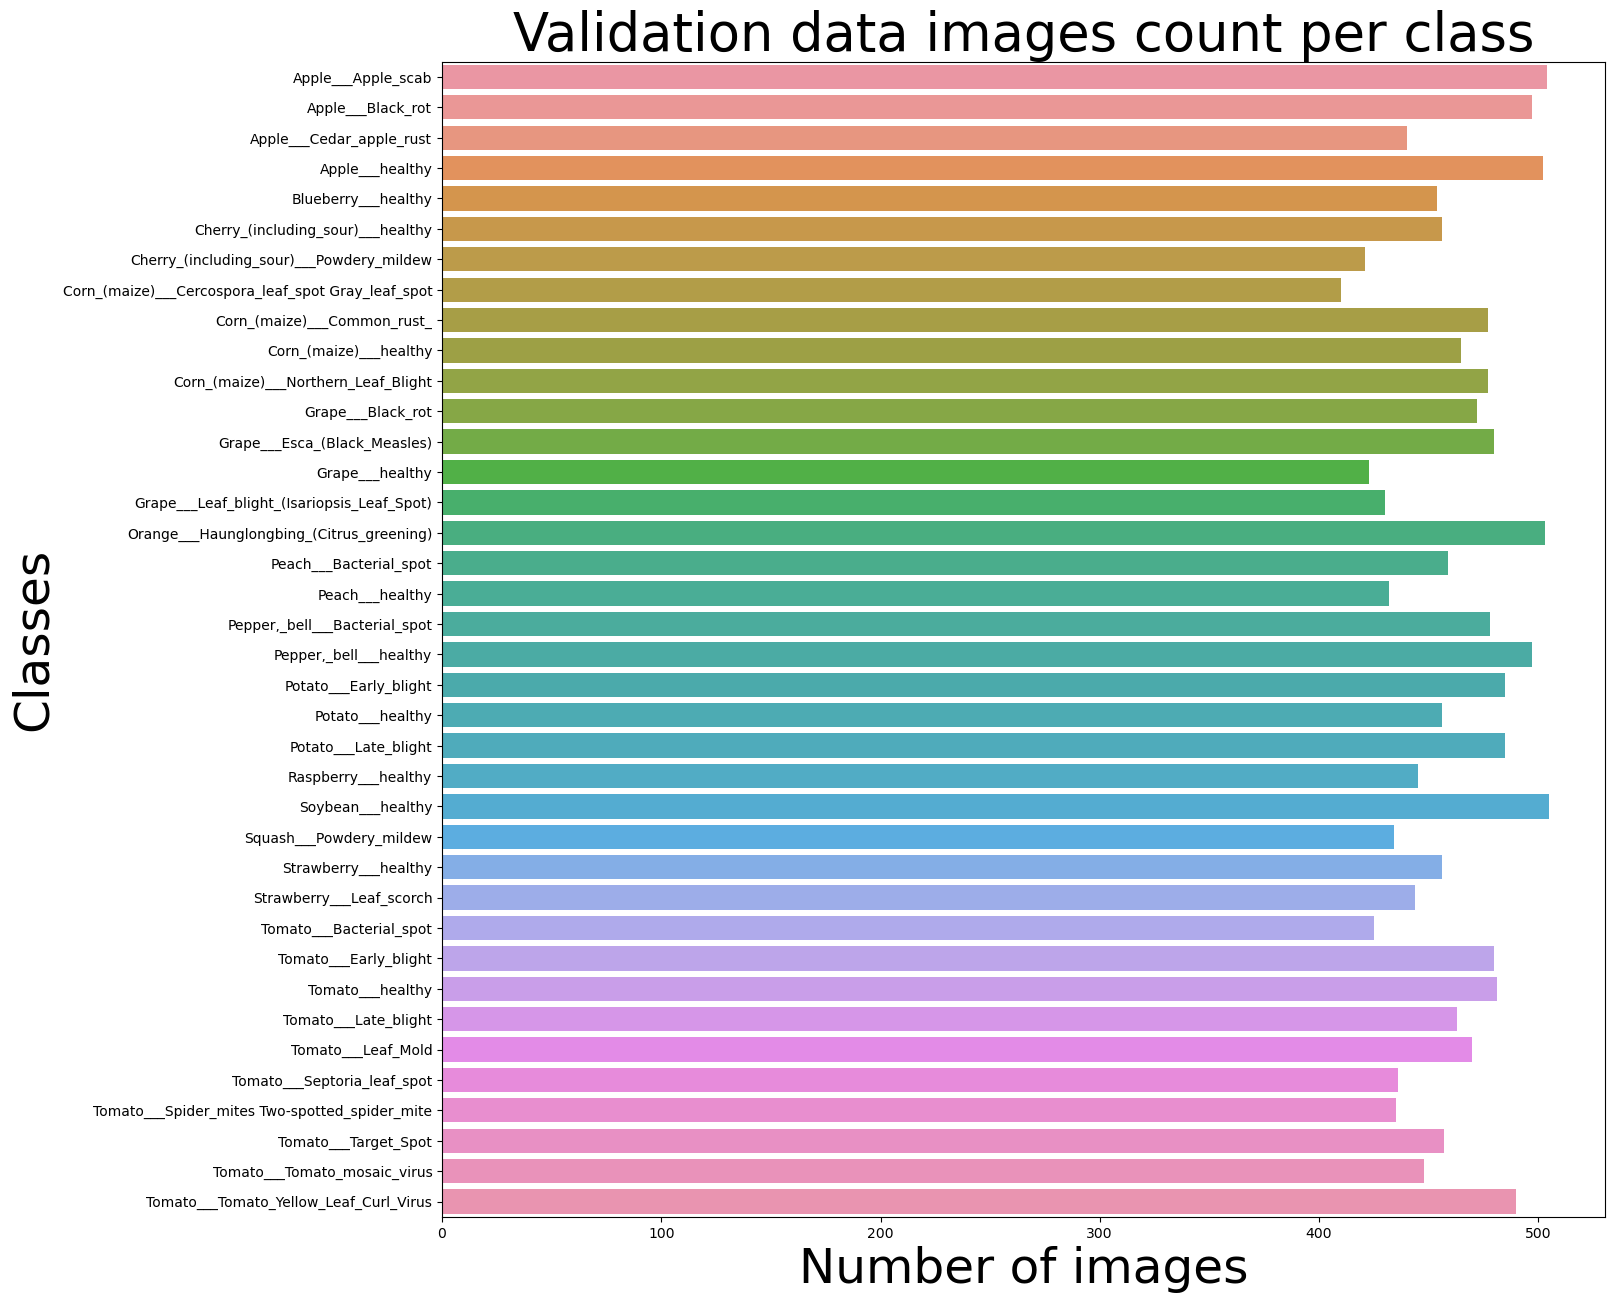

In [9]:
plt.figure(figsize=(15,15))
plt.title("Validation data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_valid.keys())
vals=list(nums_valid.values())
sns.barplot(y=keys,x=vals)

In [10]:
total_train=0
for value in nums_train.values():
    total_train+=value
print("Total number of images for training : ", total_train)

Total number of images for training :  70295


In [11]:
total_valid=0
for value in nums_valid.values():
    total_valid+=value
print("Total number of images for validation : ", total_valid)

Total number of images for validation :  17572


In [12]:
plants_unique=[]
diseases_unique=[]
for i in diseases:
    if(i.split('__'))[0] not in plants_unique:
        plants_unique.append(i.split('__')[0])
    if(i.split('___'))[1] != 'healthy':
        diseases_unique.append(i.split('___')[1])

In [13]:
print('Plants : ', plants_unique)
print('-'*100)
print('Number of plants : ', len(plants_unique))

Plants :  ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [14]:
print('Diseases : ', diseases_unique)
print('-'*100)
print('Number of diseases : ', len(diseases_unique))

Diseases :  ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'Black_rot', 'Esca_(Black_Measles)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Haunglongbing_(Citrus_greening)', 'Bacterial_spot', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Powdery_mildew', 'Leaf_scorch', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_mosaic_virus', 'Tomato_Yellow_Leaf_Curl_Virus']
----------------------------------------------------------------------------------------------------
Number of diseases :  26


In [15]:
rescale=keras.layers.Rescaling(scale=1.0/255)

In [16]:
training_data =keras.utils.image_dataset_from_directory(train_data , image_size=(256, 256))
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(256, 256))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [17]:
train_gen = training_data.map(lambda image,label:(rescale(image),label))
valid_gen  = validation_data.map(lambda image,label:(rescale(image),label))

In [19]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [21]:
history = model.fit_generator(train_gen, validation_data=valid_gen, epochs = 15)



Epoch 1/15
2197/2197 [==============================] - 2223s 1s/step - loss: 1.3750 - accuracy: 0.5962 - val_loss: 0.5214 - val_accuracy: 0.8404
Epoch 2/15
2197/2197 [==============================] - 2094s 953ms/step - loss: 0.5796 - accuracy: 0.8190 - val_loss: 0.2799 - val_accuracy: 0.9107
Epoch 3/15
2197/2197 [==============================] - 1872s 852ms/step - loss: 0.3912 - accuracy: 0.8747 - val_loss: 0.2184 - val_accuracy: 0.9296
Epoch 4/15
2197/2197 [==============================] - 2133s 971ms/step - loss: 0.2955 - accuracy: 0.9042 - val_loss: 0.2081 - val_accuracy: 0.9329
Epoch 5/15
2197/2197 [==============================] - 3126s 1s/step - loss: 0.2401 - accuracy: 0.9237 - val_loss: 0.2074 - val_accuracy: 0.9371
Epoch 6/15
2197/2197 [==============================] - 4029s 2s/step - loss: 0.1961 - accuracy: 0.9366 - val_loss: 0.2198 - val_accuracy: 0.9347
Epoch 7/15
2197/2197 [==============================] - 3466s 2s/step - loss: 0.1853 - accuracy: 0.9422 - val_loss:

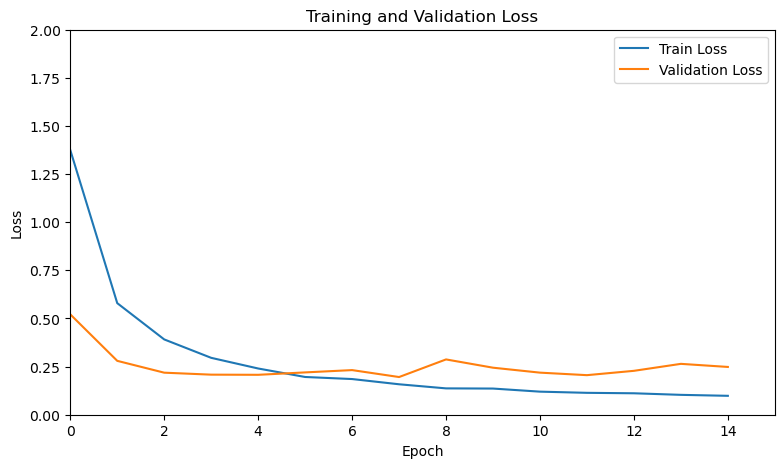

In [22]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 15)
plt.ylim(0.0,2.0)
plt.legend()

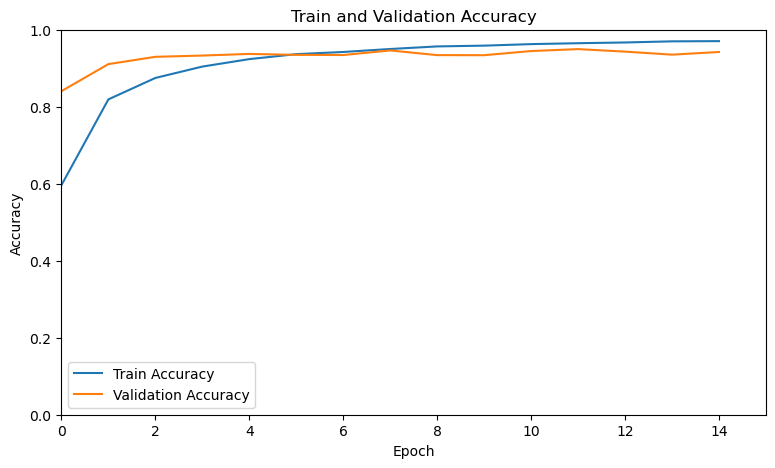

In [23]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 15)
plt.ylim(0, 1.0)
plt.legend()

In [24]:
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 1s 729ms/step


1/1 [==============================] - 1s 587ms/step


In [25]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [26]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 97.04 %
Test Accuracy   : 94.22 %
Precision Score : 94.22 %
Recall Score    : 94.22 %


<Figure size 2000x500 with 0 Axes>

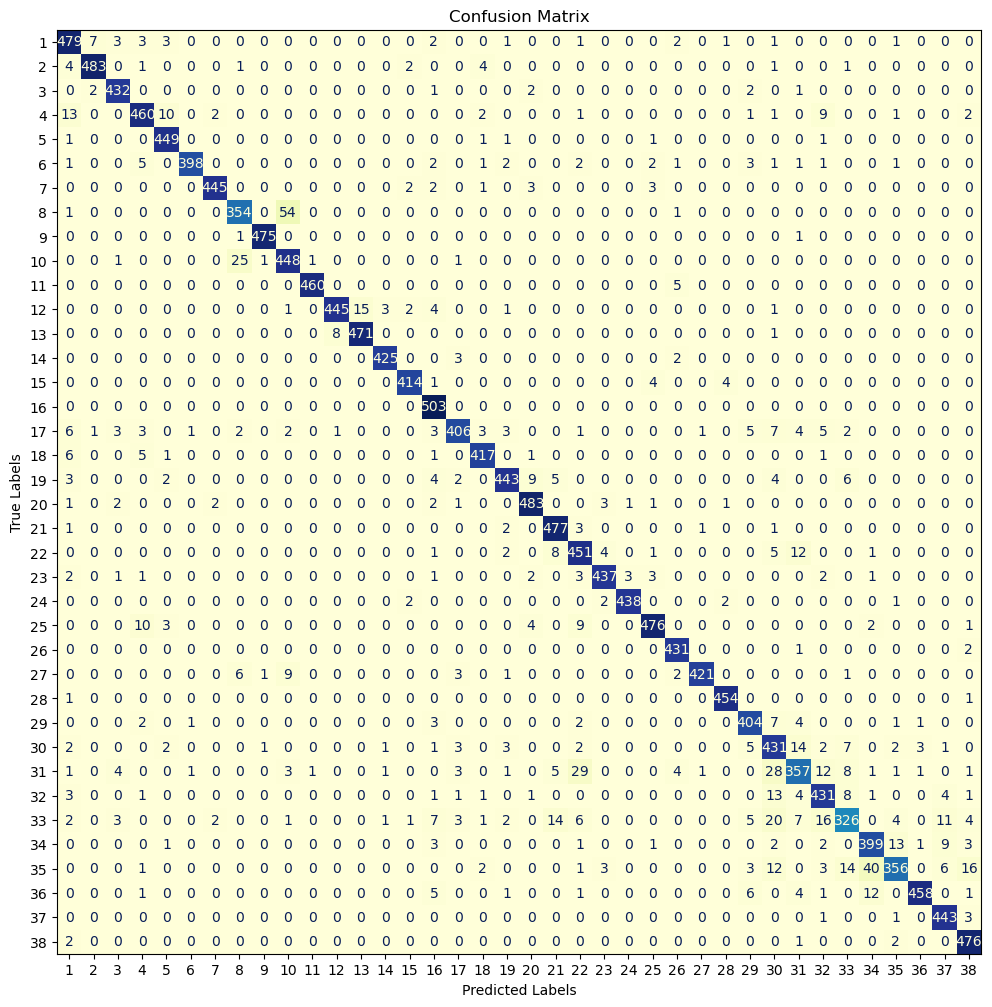

In [27]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

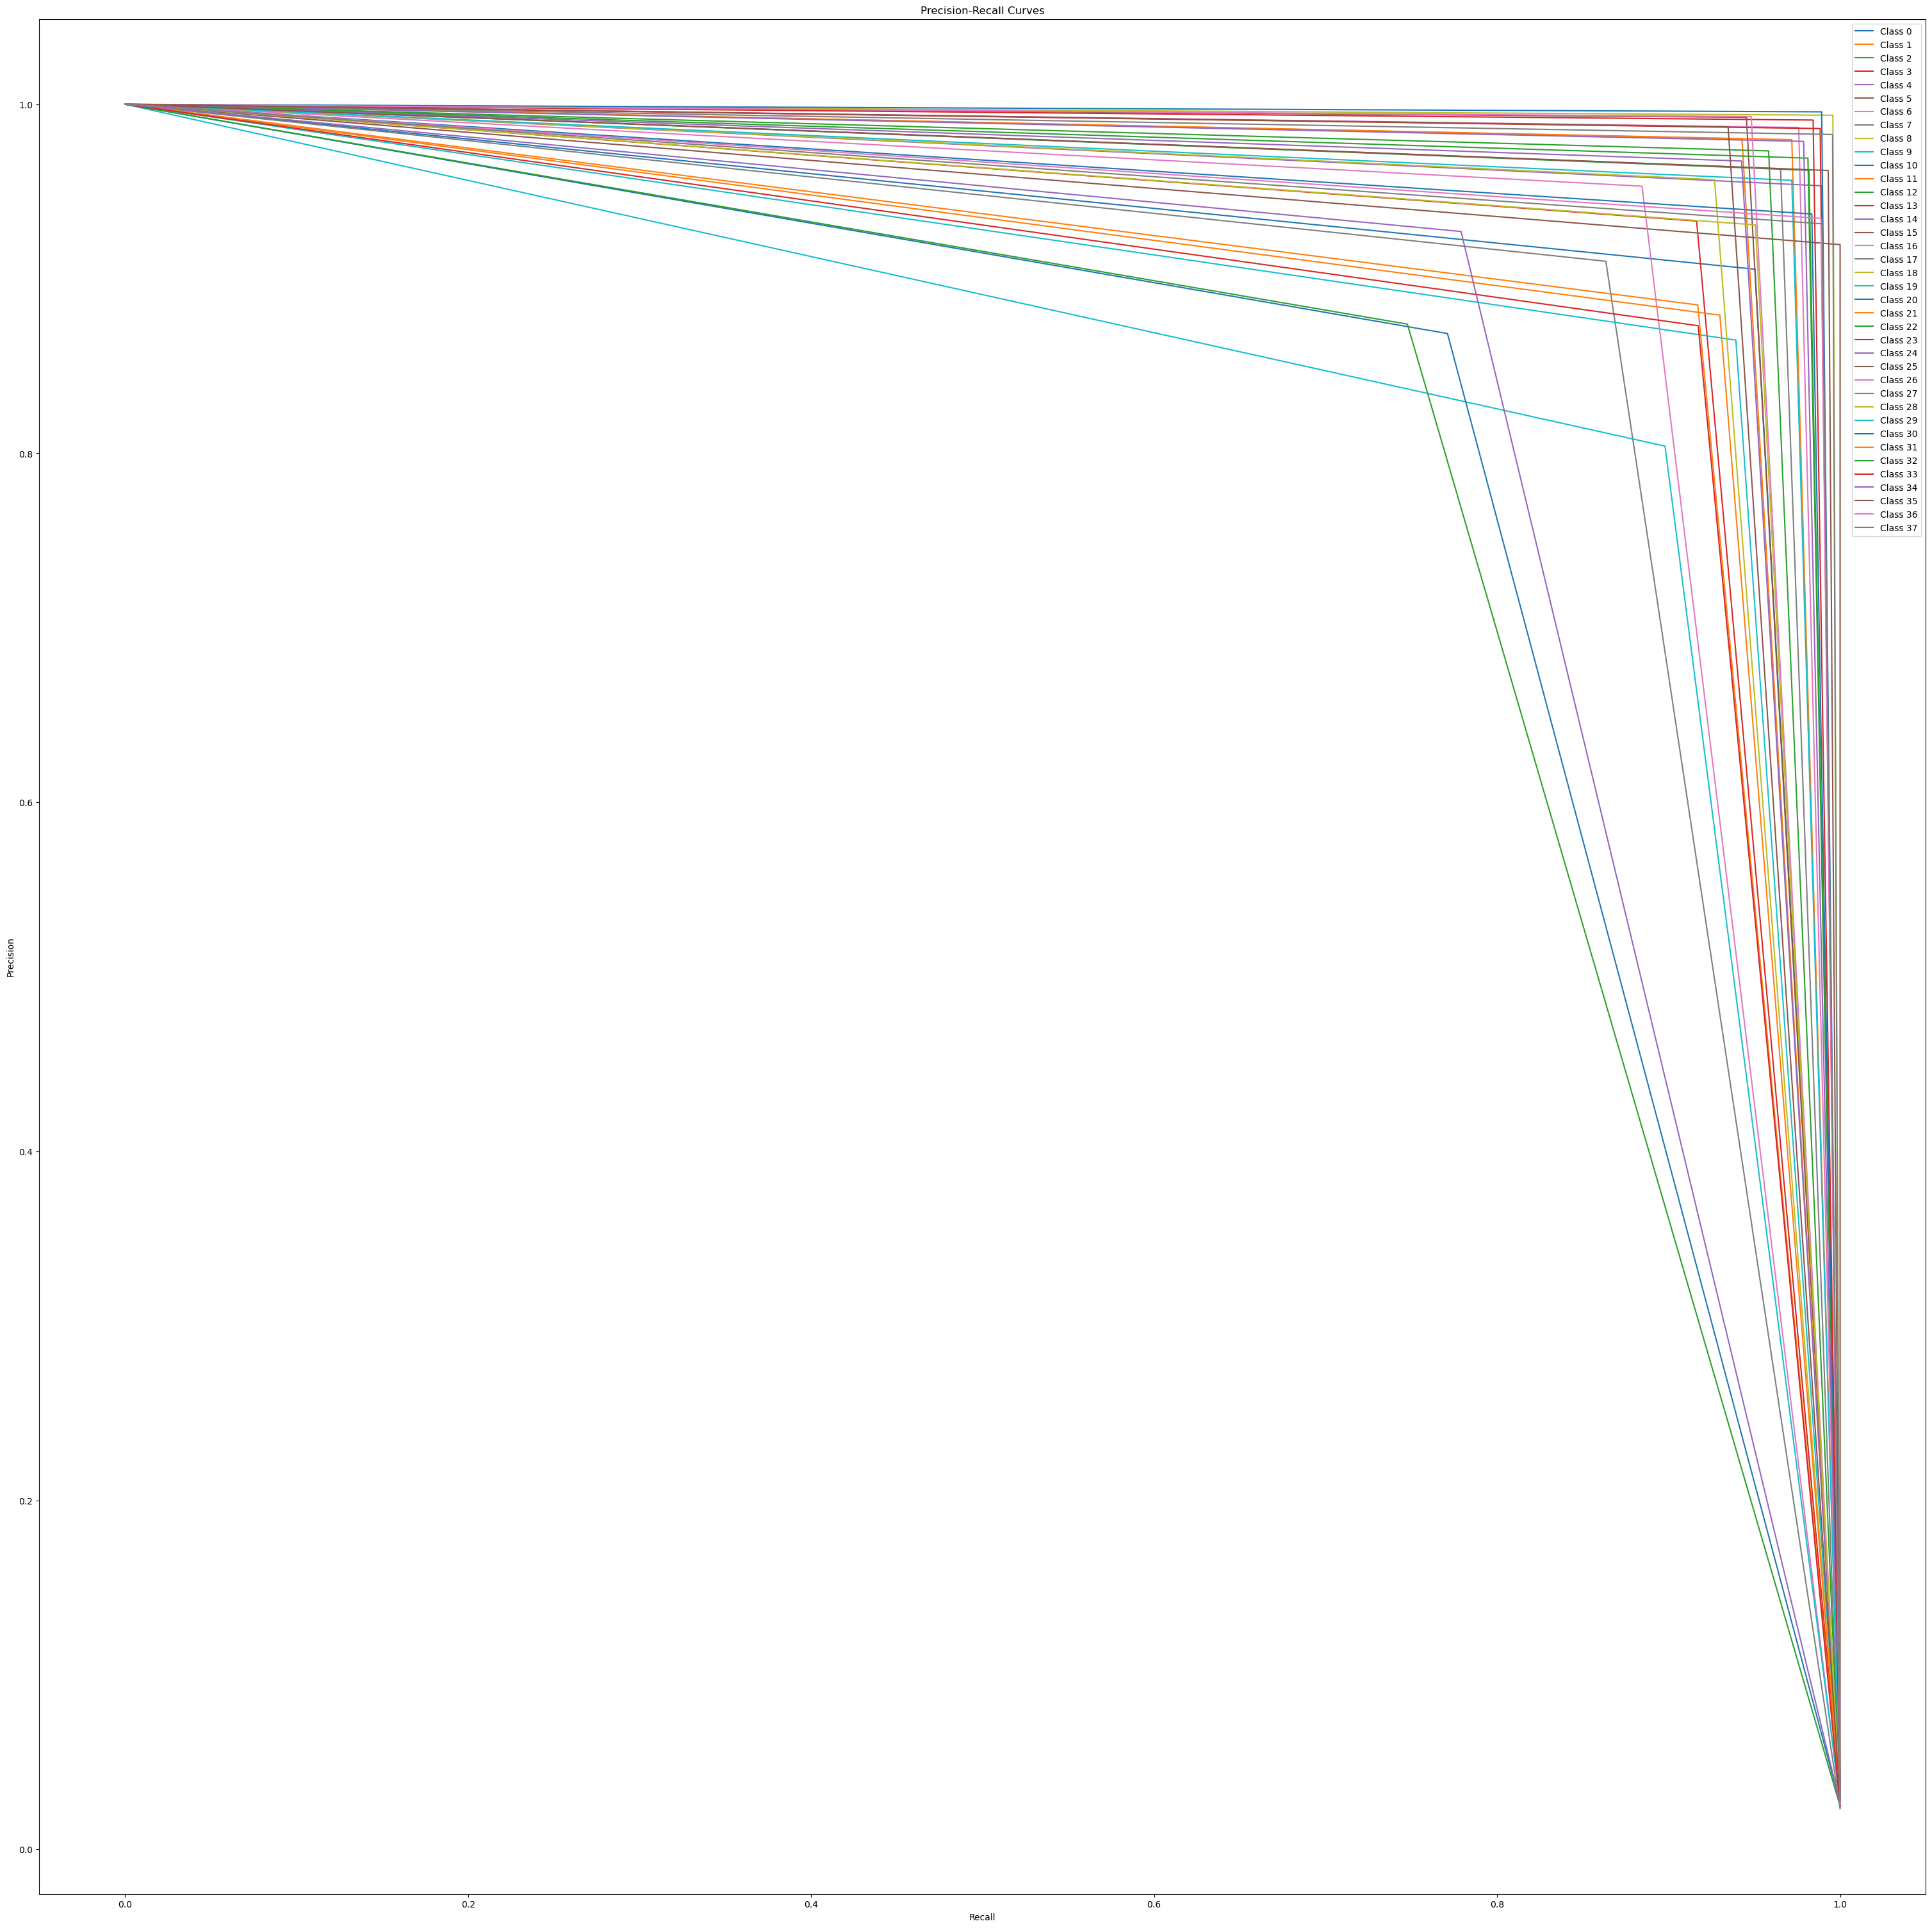

In [28]:
labels_array = np.array(labels)
predictions_array = np.array(predictions)

# Perform one-hot encoding on the labels and predictions
num_classes = 38  # Replace with the actual number of classes
labels_one_hot = label_binarize(labels_array, classes=range(num_classes))
predictions_one_hot = label_binarize(predictions_array, classes=range(num_classes))

precision = dict()
recall = dict()
plt.figure(figsize= (38,38))
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(labels_one_hot[:, i], predictions_one_hot[:, i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

1/1 [==============================] - 0s 151ms/step


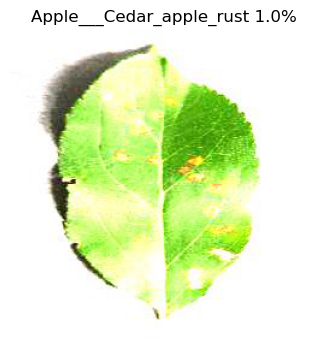

1/1 [==============================] - 0s 67ms/step


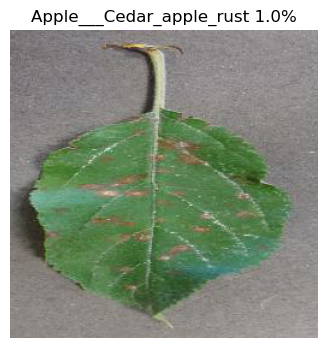

1/1 [==============================] - 0s 33ms/step


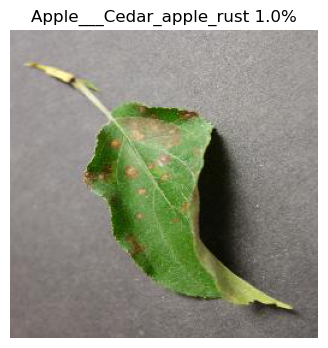

1/1 [==============================] - 0s 79ms/step


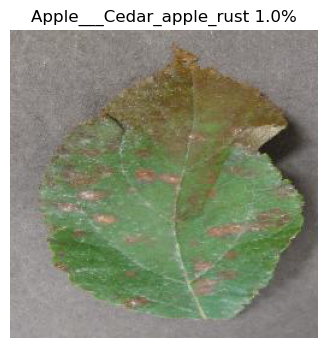

1/1 [==============================] - 0s 37ms/step


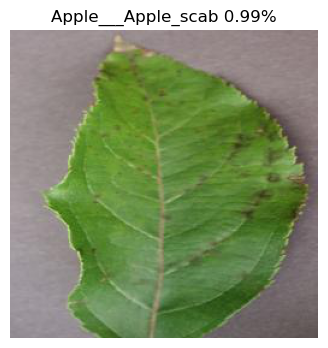

1/1 [==============================] - 0s 33ms/step


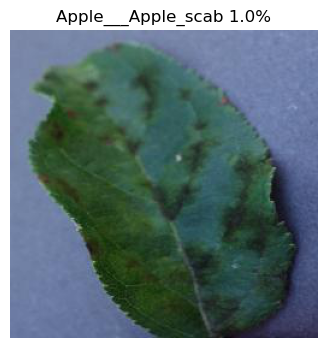

1/1 [==============================] - 0s 29ms/step


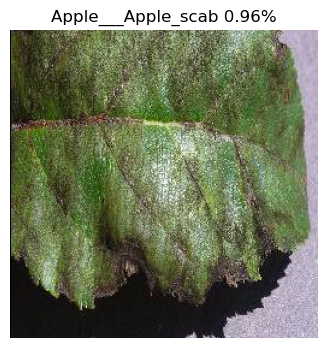

1/1 [==============================] - 0s 111ms/step


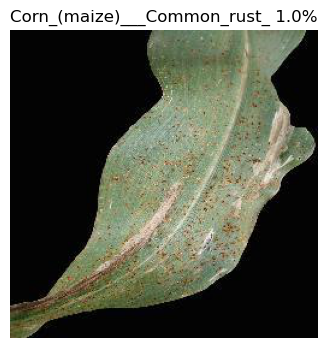

1/1 [==============================] - 0s 61ms/step


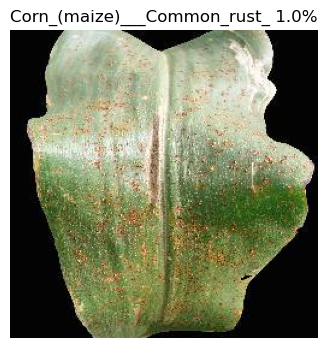

1/1 [==============================] - 0s 36ms/step


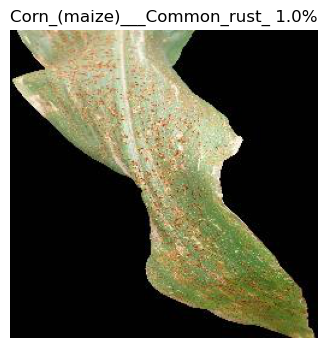

1/1 [==============================] - 0s 32ms/step


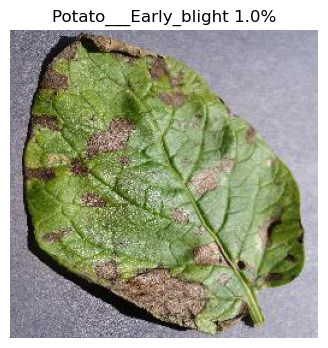

1/1 [==============================] - 0s 31ms/step


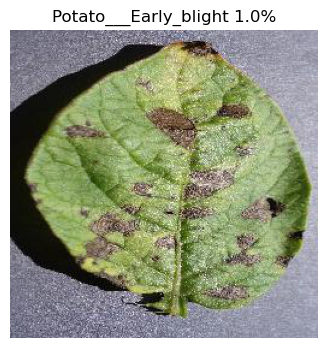

1/1 [==============================] - 0s 112ms/step


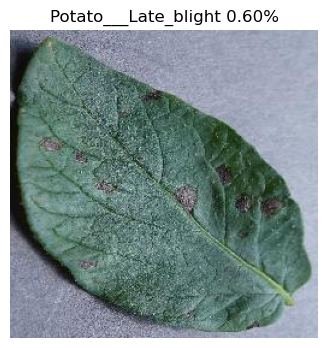

1/1 [==============================] - 0s 59ms/step


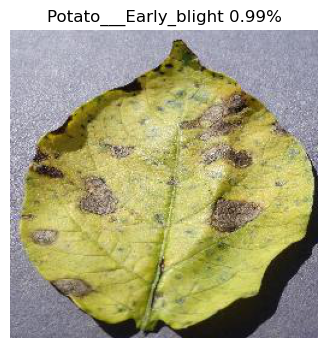

1/1 [==============================] - 0s 34ms/step


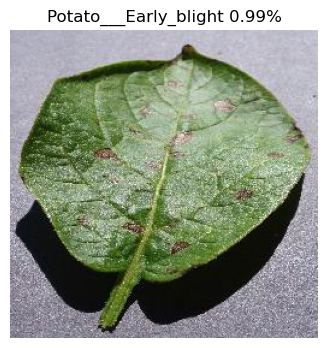

1/1 [==============================] - 0s 35ms/step


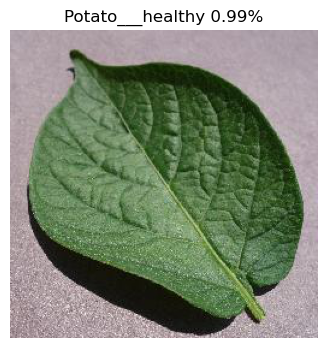

1/1 [==============================] - 0s 32ms/step


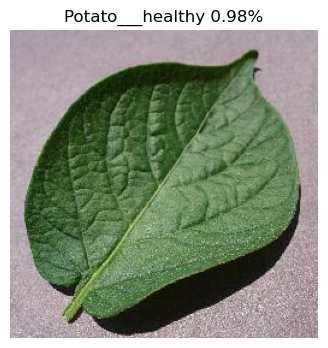

1/1 [==============================] - 0s 80ms/step


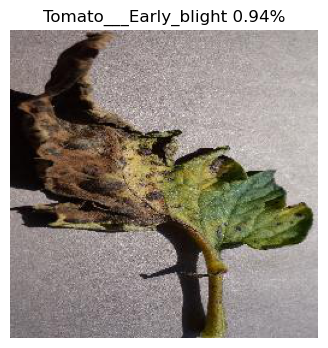

1/1 [==============================] - 0s 50ms/step


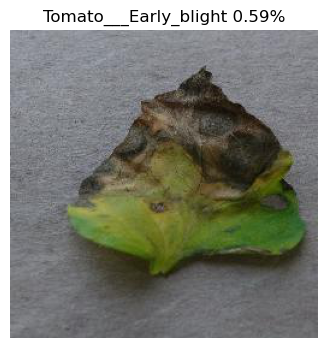

1/1 [==============================] - 0s 34ms/step


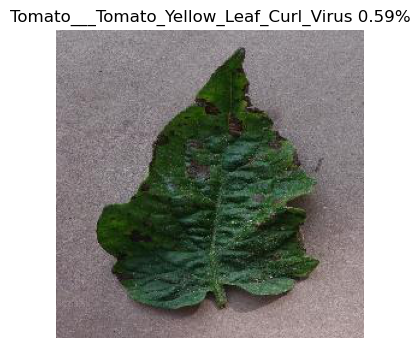

1/1 [==============================] - 0s 30ms/step


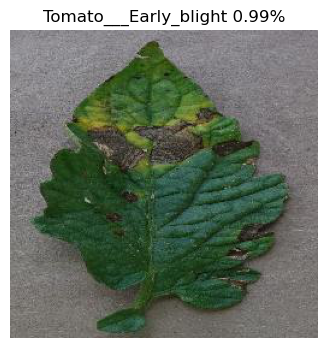

1/1 [==============================] - 0s 32ms/step


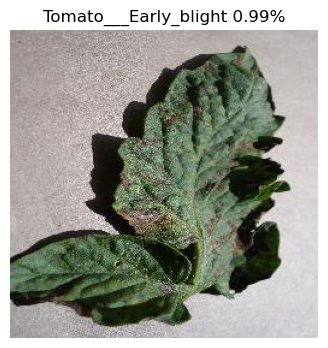

1/1 [==============================] - 0s 92ms/step


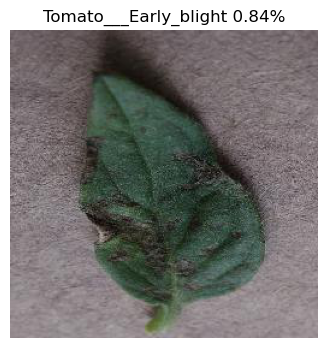

1/1 [==============================] - 0s 61ms/step


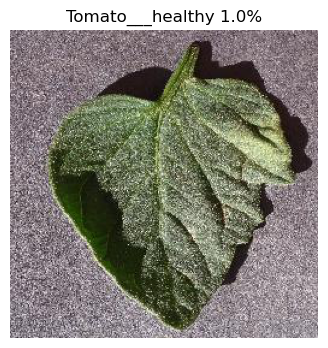

1/1 [==============================] - 0s 35ms/step


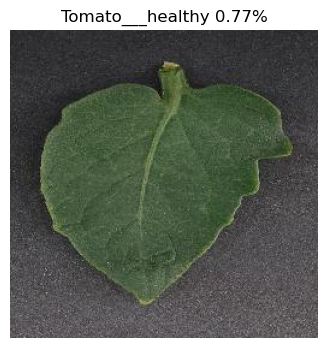

1/1 [==============================] - 0s 40ms/step


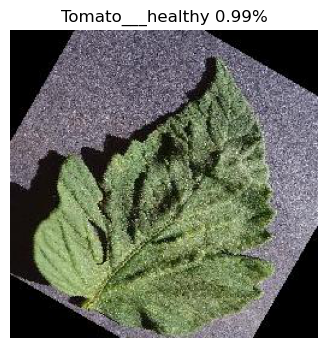

1/1 [==============================] - 0s 36ms/step


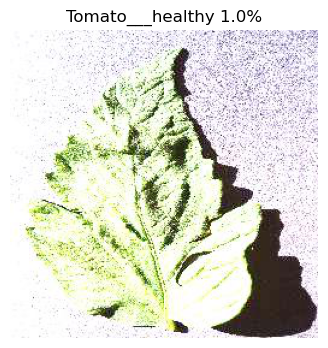

1/1 [==============================] - 0s 108ms/step


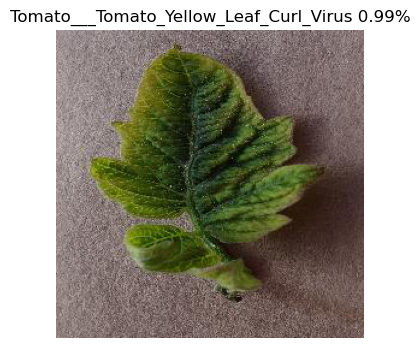

1/1 [==============================] - 0s 55ms/step


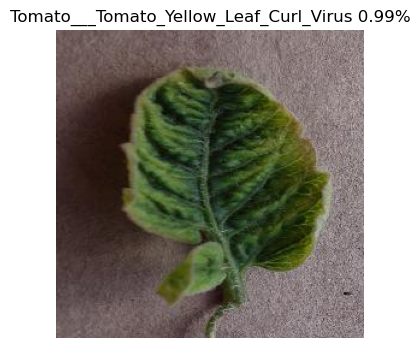

1/1 [==============================] - 0s 36ms/step


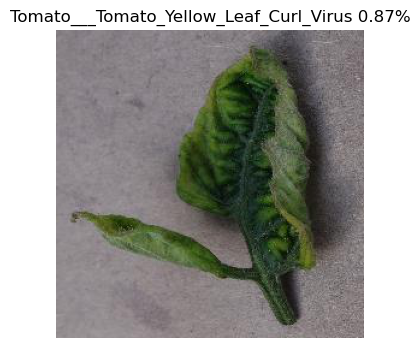

1/1 [==============================] - 0s 33ms/step


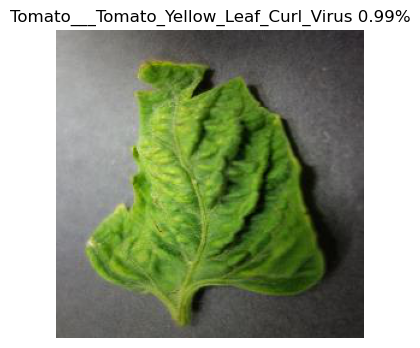

1/1 [==============================] - 0s 36ms/step


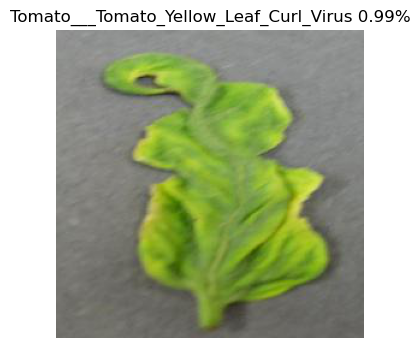

1/1 [==============================] - 0s 111ms/step


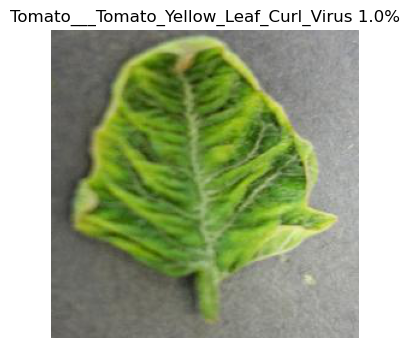

In [30]:
Li = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
      'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
      'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
      'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
      'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 
      'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
      'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 
      'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
      'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
# predicting an image
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory="C:/Users/nehal/Downloads/datast/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,33):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(256, 256))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = Li[index]
    #ploting image with predicted class name        
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()